# LinearRegession

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance = pd.read_csv('new_insurance_data.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [5]:
insurance.shape

(1338, 13)

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

<ipython-input-7-3839a2f1c717>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['age'])


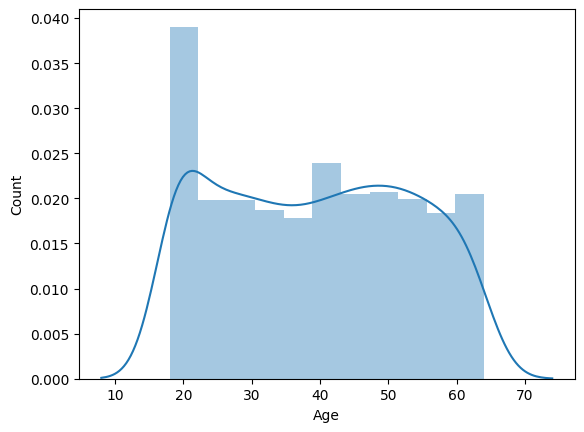

In [7]:
sns.distplot(x=insurance['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-8-e3540042ed00>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['bmi'])


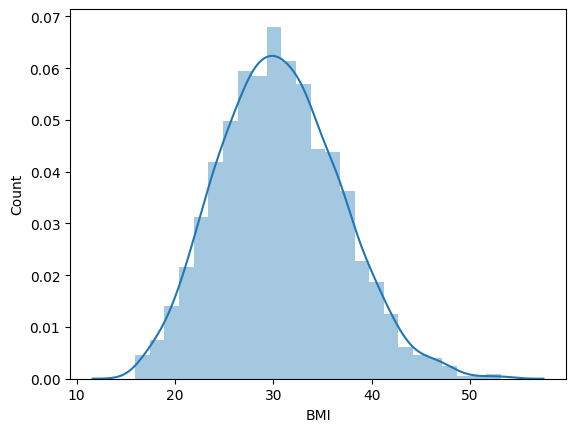

In [8]:
sns.distplot(x=insurance['bmi'])
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

<ipython-input-9-c2fb82e1a421>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['children'])


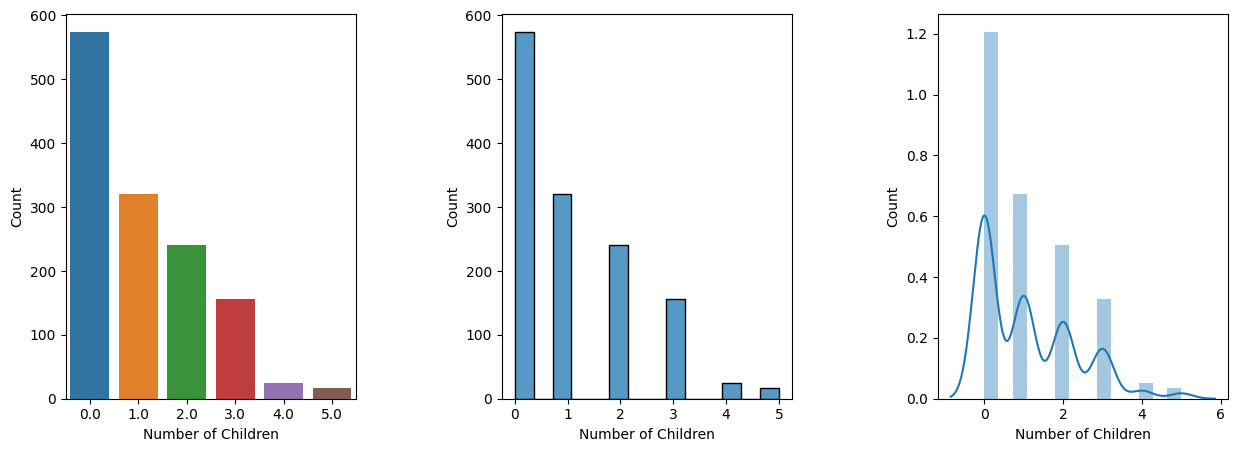

In [9]:
plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

<ipython-input-10-05228b0e5221>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['Claim_Amount'])


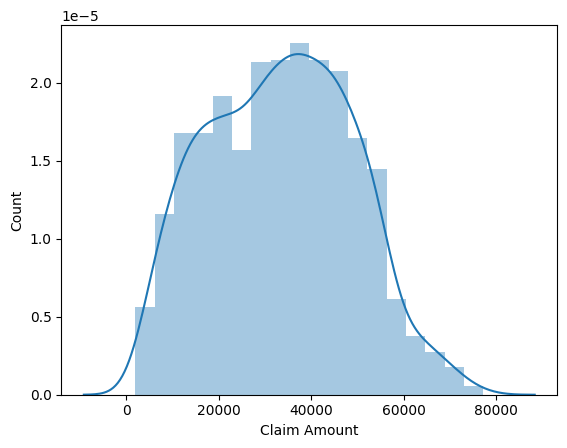

In [10]:
sns.distplot(x=insurance['Claim_Amount'])
plt.xlabel('Claim Amount')
plt.ylabel('Count')
plt.show()

<ipython-input-11-fee33c493b10>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['past_consultations'])


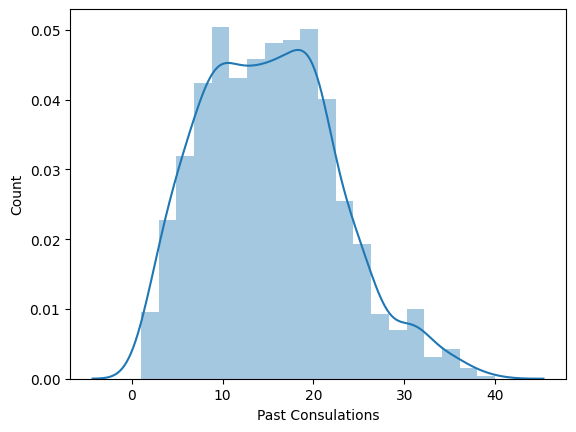

In [11]:
sns.distplot(x=insurance['past_consultations'])
plt.xlabel('Past Consulations')
plt.ylabel('Count')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
insurance['smoker'] = le.fit_transform(insurance['smoker'])
insurance['smoker'] = insurance['smoker'].astype(int)

insurance['sex'] = le.fit_transform(insurance['sex'])
insurance['sex'] = insurance['sex'].astype(int)

insurance['region'] = le.fit_transform(insurance['region'])
insurance['region'] = insurance['region'].astype(int)

In [13]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   int64  
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   int64  
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   int64  
 12  charges             

In [14]:
insurance.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [15]:
insurance['age'] = insurance['age'].fillna(insurance['age'].mean())
insurance['bmi'] = insurance['bmi'].fillna(insurance['bmi'].mean())
insurance['children'] = insurance['children'].fillna(insurance['children'].median())
insurance['Claim_Amount'] = insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].mean())
insurance['past_consultations'] = insurance['past_consultations'].fillna(insurance['past_consultations'].mean())
insurance['num_of_steps'] = insurance['num_of_steps'].fillna(insurance['num_of_steps'].mean())
insurance['Hospital_expenditure'] = insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median())
insurance['NUmber_of_past_hospitalizations'] = insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median())
insurance['Anual_Salary'] = insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median())

In [16]:
insurance.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [17]:
correlation = insurance.corr()
correlation

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.019105,0.112161,0.041616,-0.028868,0.122828,0.168311,0.512985,0.137146,0.359434,0.163392,0.004659,0.293604
sex,-0.019105,1.000000,0.045170,0.018533,0.076185,-0.003884,0.050403,0.010342,0.069940,0.000214,0.072702,0.004588,0.057292
bmi,0.112161,0.045170,1.000000,0.007755,0.003610,0.093313,0.130667,0.135903,0.256892,0.137043,0.241505,0.158261,0.198691
children,0.041616,0.018533,0.007755,1.000000,0.009608,0.041502,0.054832,0.163487,0.025315,0.185546,0.041260,0.015011,0.070877
smoker,-0.028868,0.076185,0.003610,0.009608,1.000000,0.334406,0.502836,0.665711,0.662698,0.588682,0.739676,-0.002181,0.787251
Claim_Amount,0.122828,-0.003884,0.093313,0.041502,0.334406,1.000000,0.271482,0.398342,0.369921,0.379889,0.403974,0.009028,0.435635
past_consultations,0.168311,0.050403,0.130667,0.054832,0.502836,0.271482,1.000000,0.559682,0.542172,0.500131,0.589304,-0.001866,0.627592
num_of_steps,0.512985,0.010342,0.135903,0.163487,0.665711,0.398342,0.559682,1.000000,0.624835,0.845128,0.733685,-0.041920,0.889848
Hospital_expenditure,0.137146,0.069940,0.256892,0.025315,0.662698,0.369921,0.542172,0.624835,1.000000,0.651827,0.957189,0.029446,0.871796
NUmber_of_past_hospitalizations,0.359434,0.000214,0.137043,0.185546,0.588682,0.379889,0.500131,0.845128,0.651827,1.000000,0.735802,-0.031450,0.820682


<Axes: >

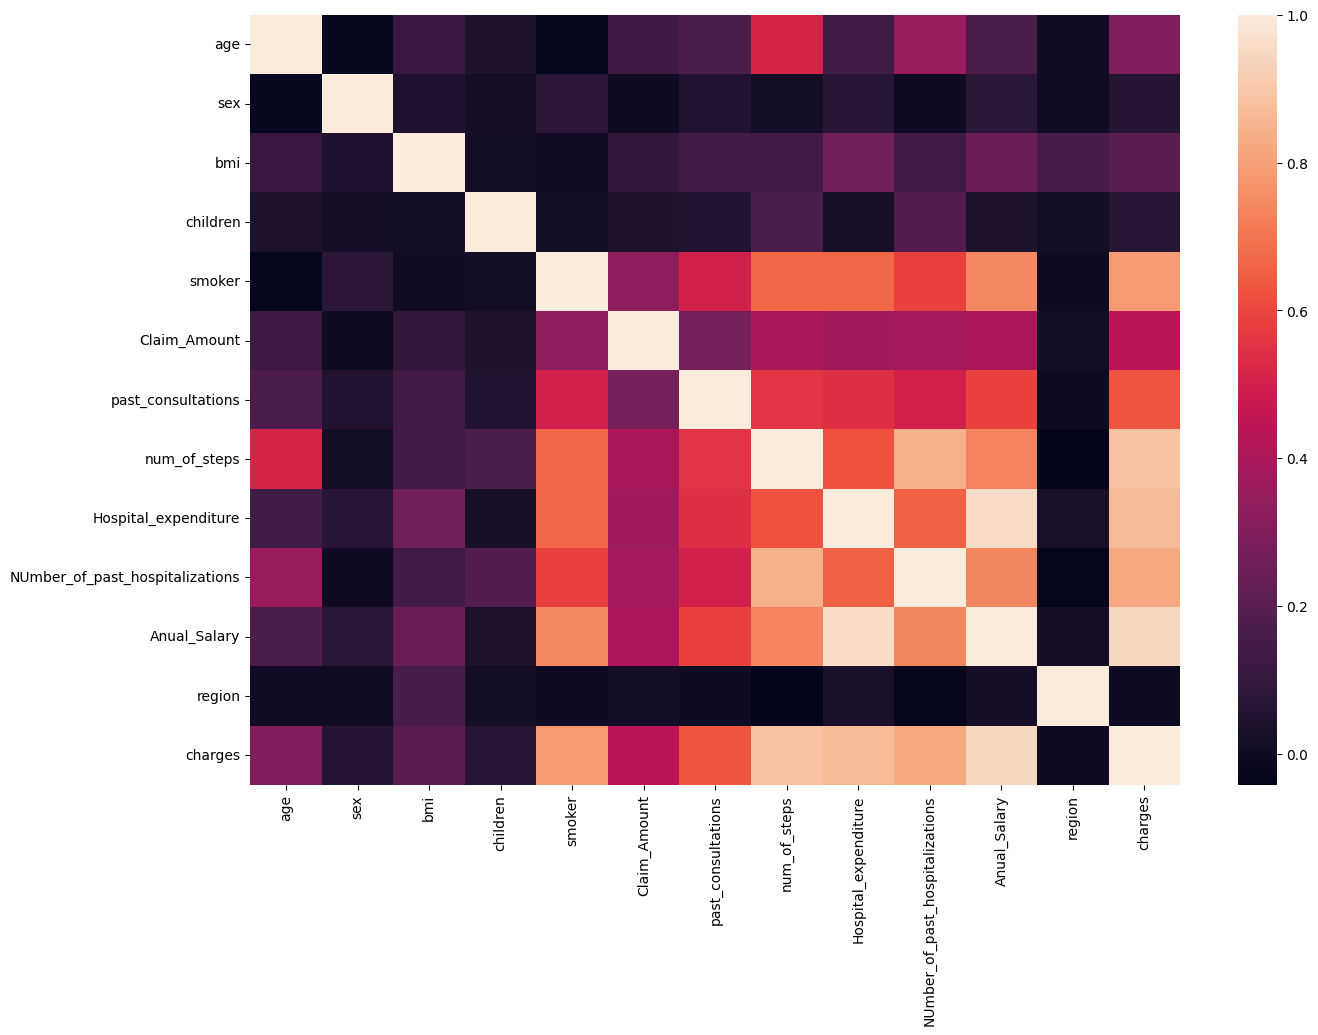

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation)

In [19]:
X = insurance.drop(['charges'],axis=1)
y = insurance.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression

model_uno = LinearRegression()
model_uno.fit(X_train, y_train)

LinearRegression()

In [23]:
predictions = model_uno.predict(X_test)

In [24]:
from sklearn.metrics import r2_score

r2_score(y_test, predictions)

0.972292983018323

LabelEncoding - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

LinearRegression - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Evaluation metrics (r2_score) - https://scikit-learn.org/stable/modules/model_evaluation.html

Starndadization - http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

OneHotEncoding - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html